Our goal here is to see what is happening under the hood while we train a model to classify handwritten digits of MNIST dataset.

We also visualize our weights of the model. The bulk of the work of machine learning is figuring out what the optimal weights are; once they are calculated, you have the “cheat sheet” and can easily find answers.

Our classifier makes its prediction by comparing how similar or different the digit is to the red and blue. Consider the colors as-- darker the red, the better of a hit; white as neutral; and blue as misses.

So, now that we have our cheat sheet, let’s load one example and apply our classifier to that one example:

We will load the data and import the libraries 

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import matplotlib.pyplot as plt
import numpy as np
import random as ran

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Let’s define a couple of functions that will assign the amount of training and test data we will load from the data set

In [2]:
def train_size(num):
    print('Total training images in dataset = ' + str(mnist.train.images.shape))
    print('---------------------')
    xtrain = mnist.train.images[:num,:]
    print('xtrain examples loaded = ' + str(xtrain.shape))
    ytrain = mnist.train.labels[:num,:]
    print('ytrain examples loaded = ' + str(ytrain.shape))
    return xtrain, ytrain

def test_size(num):
    print('Total testing images in dataset = ' + str(mnist.test.images.shape))
    print('---------------------')
    xtest = mnist.test.images[:num,:]
    print('xtest examples loaded = ' + str(xtest.shape))
    ytest = mnist.test.labels[:num,:]
    print('ytest examples loaded = ' + str(ytest.shape))
    return xtest, ytest

We’ll define some simple functions for resizing and displaying the data

In [3]:
def display_digit(num):
    print(ytrain[num])
    label = ytrain[num].argmax(axis=0)
    image = xtrain[num].reshape([28,28])
    plt.title('Example: %d Label: %d' %(num, label))
    plt.imshow(image, cmap = plt.get_cmap('gray_r'))
    plt.show()

def display_mult_flat(start, stop):
    images = xtrain[start].reshape([1,784])
    for i in range(start + 1, stop):
        images = np.concatenate((images, xtrain[i].reshape([1,784])))
    plt.imshow(images, cmap = plt.get_cmap('gray_r'))
    plt.show()


we define variables with how many training and test examples we would like to load. For now, we will load all the data but we will change this value later on to save resources

In [4]:
xtrain, ytrain = train_size(55000)

Total training images in dataset = (55000, 784)
---------------------
xtrain examples loaded = (55000, 784)
ytrain examples loaded = (55000, 10)


In our data set, there are 55,000 examples of handwritten digits from zero to nine. Each example is a 28x28 pixel image flattened in an array with 784 values representing each pixel’s intensity. The examples need to be flattened for TensorFlow to make sense of the digits linearly. 

This shows that in xtrain we have loaded 55,000 examples each with 784 pixels. Our xtrain variable is a 55,000 row and 784 column matrix.

The ytrain data is the associated labels for all the xtrain examples. Rather than storing the label as an integer, it is stored as a 1x10 binary array with the one representing the digit. 

This is also known as one-hot encoding. In the example below, the array represents a 7

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


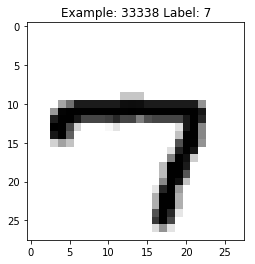

In [5]:
display_digit(ran.randint(0, xtrain.shape[0]))

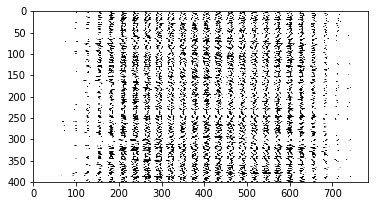

In [6]:
display_mult_flat(0,400)

In [7]:
import tensorflow as tf
sess = tf.Session()

A placeholder, as the name suggests, is a variable used to feed data into. The only requirement is that in order to feed data into this variable, we need to match its shape and type exactly. The TensorFlow website explains that “A placeholder exists solely to serve as the target of feeds. It is not initialized and contains no data.” Here, we define our x placeholder as the variable to feed our x_train data into

In [8]:
x = tf.placeholder(tf.float32, shape = [None, 784])

When we assign None to our placeholder, it means the placeholder can be fed as many examples as you want to give it. In this case, our placeholder can be fed any multitude of 784-sized values.

We then define y_, which will be used to feed y_train into.

In [9]:
y_ = tf.placeholder(tf.float32, shape = [None, 10])

Next, we will define the weights W and bias b. These two values are the grunt workers of the classifier—they will be the only values we will need to calculate our prediction after the classifier is trained.

We will first set our weight and bias values to zeros because TensorFlow will optimize these values later. Notice how our W is a collection of 784 values for each of the 10 classes:

In [10]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

We will now define y, which is our classifier function. This particular classifier is also known as multinomial logistic regression. We make our prediction by multiplying each flattened digit by our weight and then adding our bias:

In [11]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [12]:
print(y)

Tensor("Softmax:0", shape=(?, 10), dtype=float32)


You cannot just print a TensorFlow graph object to get its values; you must run an appropriate session in which you feed it data. So, let’s feed our classifier three examples and see what it predicts. In order to run a function in our session, we first must initialize the variables in our session. Notice if you just run sess.run(y) TensorFlow will complain that you need to feed it data:

In [13]:
xtrain, ytrain = train_size(3)
sess.run(tf.global_variables_initializer())
print(sess.run(y, feed_dict = {x: xtrain}))

Total training images in dataset = (55000, 784)
---------------------
xtrain examples loaded = (3, 784)
ytrain examples loaded = (3, 10)
[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]


But how did TensorFlow know the probabilities, you might ask; it learned the probabilities by calculating the softmax of our results. The Softmax function takes a set of values and forces their sum to equal one, which will give probabilities for each value. Any softmax value will always be greater than zero and less than one.

In [14]:
print(sess.run(tf.nn.softmax(tf.zeros([4]))))
print(sess.run(tf.nn.softmax(tf.constant([0.1, 0.005, 2]))))

[0.25 0.25 0.25 0.25]
[0.11634309 0.10579926 0.7778576 ]


Next, we will create our cross_entropy function, also known as a loss or cost function. It measures how good (or bad) of a job we are doing at classifying. The higher the cost, the higher the level of inaccuracy. It calculates accuracy by comparing the true values from y_train to the results of our prediction y for each example. The goal is to minimize your loss.

In [15]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices = [1]))

This function is taking the log of all our predictions y (whose values range from 0 to 1) and element wise multiplying by the example’s true value y_. If the log function for each value is close to zero, it will make the value a large negative number (i.e., -np.log(0.01) = 4.6), and if it is close to 1, it will make the value a small negative number (i.e., -np.log(0.99) = 0.1).

Next we begin to train our classifier. In order to train, we have to develop appropriate values for W and b that will give us the lowest possible loss.

In [16]:
xtrain, ytrain = train_size(5500)
xtest, ytest = test_size(10000)
learning_rate = 0.1
train_steps = 2300

Total training images in dataset = (55000, 784)
---------------------
xtrain examples loaded = (5500, 784)
ytrain examples loaded = (5500, 10)
Total testing images in dataset = (10000, 784)
---------------------
xtest examples loaded = (10000, 784)
ytest examples loaded = (10000, 10)


We can now initialize all variables so that they can be used by our TensorFlow graph:

In [17]:
init = tf.global_variables_initializer()
sess.run(init)

Now, we need to train our classifier using gradient descent. We first define our training method and some variables for measuring our accuracy. The variable training will perform the gradient descent optimizer with a chosen LEARNING_RATE in order to try to minimize our loss function cross_entropy

In [18]:
training = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Now, we’ll define a loop that repeats TRAIN_STEPS times; for each loop, it runs training, feeding in values from x_train and y_train using feed_dict. In order to calculate accuracy, it will run accuracy to classify the unseen data in x_test by comparing its y and y_test. It is vitally important that our test data was unseen and not used for training data. If a teacher were to give students a practice exam and use that same exam for the final exam, you would have a very biased measure of students’ knowledge:

In [19]:
for i in range(train_steps + 1):
    sess.run(training, feed_dict = {x: xtrain, y_: ytrain})
    if i%100 == 0:
        print("Training Step: " + str(i) + ' Accuracy = ' + str(sess.run(accuracy, feed_dict = {x: xtest, y_: ytest})) 
              + ' Loss = ' + str(sess.run(cross_entropy, feed_dict = {x: xtrain, y_: ytrain})))

Training Step: 0 Accuracy = 0.5988 Loss = 2.1881986
Training Step: 100 Accuracy = 0.8647 Loss = 0.5802968
Training Step: 200 Accuracy = 0.879 Loss = 0.45982188
Training Step: 300 Accuracy = 0.8866 Loss = 0.40857172
Training Step: 400 Accuracy = 0.8904 Loss = 0.37808114
Training Step: 500 Accuracy = 0.8943 Loss = 0.35697556
Training Step: 600 Accuracy = 0.8974 Loss = 0.34104997
Training Step: 700 Accuracy = 0.8984 Loss = 0.3283495
Training Step: 800 Accuracy = 0.9 Loss = 0.3178265
Training Step: 900 Accuracy = 0.9005 Loss = 0.3088623
Training Step: 1000 Accuracy = 0.9009 Loss = 0.30106458
Training Step: 1100 Accuracy = 0.9023 Loss = 0.29416993
Training Step: 1200 Accuracy = 0.9029 Loss = 0.28799522
Training Step: 1300 Accuracy = 0.9033 Loss = 0.28240606
Training Step: 1400 Accuracy = 0.9039 Loss = 0.27730304
Training Step: 1500 Accuracy = 0.9048 Loss = 0.27260992
Training Step: 1600 Accuracy = 0.9057 Loss = 0.26826683
Training Step: 1700 Accuracy = 0.9062 Loss = 0.2642261
Training Step:

For each step in the loop, depending on how large the cross_entropy is the classifier will move a LEARNING_RATE step toward where it thinks cross_entropy’s value will be smaller. This lower point is calculated by TensorFlow using the derivative of the cross_entropy, which gives the slope of the tangent line at a given point. As it moves toward this new point, the values W and b change and the slope decreases. As in the case of y = x^2, you can think of this as moving toward X = 0, which is also called the minimum. If the learning rate is too small, the classifier will take very small steps when learning; if it's too high, the steps it takes will be too large, and it may figuratively “overshoot” the true minimum.

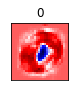

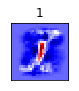

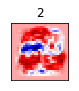

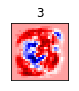

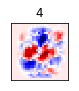

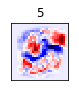

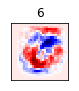

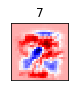

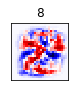

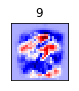

In [20]:
for i in range(10):
    plt.subplot(2,5,i+1)
    weight = sess.run(W)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap = plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
    plt.show()

This is a visualization of our weights from 0-9. This is the most important aspect of our classifier. The bulk of the work of machine learning is figuring out what the optimal weights are; once they are calculated, you have the “cheat sheet” and can easily find answers. 

Our classifier makes its prediction by comparing how similar or different the digit is to the red and blue. I like to think the darker the red, the better of a hit; white as neutral; and blue as misses.

So, now that we have our cheat sheet, let’s load one example and apply our classifier to that one example:

Total training images in dataset = (55000, 784)
---------------------
xtrain examples loaded = (1, 784)
ytrain examples loaded = (1, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


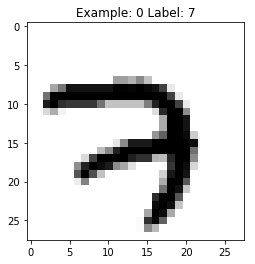

In [21]:
xtrain, ytrain = train_size(1)
display_digit(0)

Let’s look at our predictor y:

In [22]:
answer = sess.run(y, feed_dict = {x:xtrain, y_:ytrain})
print(answer)

[[2.55308842e-05 1.29163545e-05 9.00640786e-02 1.89089309e-02
  9.30040900e-04 1.44064725e-05 4.84356606e-05 8.51819634e-01
  7.13865180e-03 3.10373977e-02]]


But this is not very useful for us. So, we use the argmax function to return the position of the highest value and that gives us our prediction.

In [23]:
answer.argmax()

7

So, let us now take our knowledge to create a function to make predictions on a random digit in this data set:

In [24]:
def display_compare(num):
    # Basically to train one image at a time
    xtrain = mnist.train.images[num,:].reshape(1,784)
    ytrain = mnist.train.labels[num,:]
    
    # To get the label as an integer
    label = ytrain.argmax()
    
    # Getting prediction as an integer
    prediction = sess.run(y, feed_dict = {x: xtrain}).argmax()
    plt.title('Prediction: %d Label: %d' % (prediction, label))
    plt.imshow(xtrain.reshape([28,28]), cmap = plt.get_cmap('gray_r'))
    plt.show()

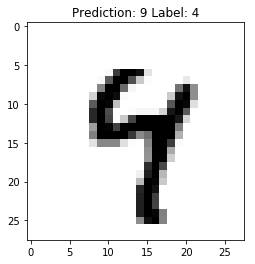

In [25]:
display_compare(2)